In [1]:
!pip install wordcloud

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
df = pd.read_csv("spam.csv",encoding="latin-1")
#ingilizce olmayan karakterleri tanımış oluyor

In [23]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [24]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1, inplace=True)

In [25]:
df.columns = ["Class","Text"]

In [26]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
#ham - 0
#spam -1

In [28]:
df["Label"] = df["Class"].map({"ham" : 0, "spam" : 1})

In [29]:
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<AxesSubplot:xlabel='Class', ylabel='count'>

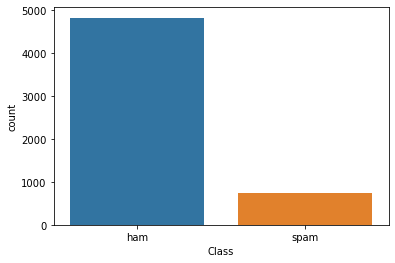

In [30]:
sns.countplot(x=df["Class"])

In [31]:
df["Text"] = df["Text"].str.lower() #küçük harf
df["Text"] = df["Text"].str.replace('[^\w\s]','') #noktalama
df["Text"] = df["Text"].str.replace('\d+','') #rakam
df["Text"] = df["Text"].str.replace('\n',' ').replace('\r',' ') #enter-new line

In [32]:
#Word Cloud
#kelimelerin metin içerisindeki tekrar miktarlarına göre 
#büyüklüklerinin ayarlanarak bir görsel oluşturulması

In [76]:
from wordcloud import STOPWORDS
from PIL import Image #wordcloud'u istediğimiz fotoğrafın şeklinde yapanilmek için
import numpy as np

In [77]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask = np.array(Image.open("alice_mask.png")) 
    #herhangi bir png eklersen word cloud onun şeklinde dolduruluyor. Bu örnekte deneme amaçlı Alice fotoğrafı eklenmiştir.
    wc = WordCloud(background_color = bgcolor,stopwords = STOPWORDS,mask=mask)
    wc.generate(''.join(data))
    plt.imshow(wc)
    plt.axis("off") #x ve y ekseni çizgilerini göstermemiş oluyoruz

In [78]:
ham = df[df["Class"]=="ham"]["Text"]
spam = df[df["Class"]=="spam"]["Text"]

In [79]:
ham

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
6       even my brother is not like to speak with me t...
                              ...                        
5565                                            huh y lei
5568                 will ì_ b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: Text, Length: 4825, dtype: object

In [80]:
spam

2       free entry in  a wkly comp to win fa cup final...
5       freemsg hey there darling its been  weeks now ...
8       winner as a valued network customer you have b...
9       had your mobile  months or more u r entitled t...
11      six chances to win cash from  to  pounds txt c...
                              ...                        
5537    want explicit sex in  secs ring  now costs pmi...
5540    asked mobile if  chatlines inclu in free mins ...
5547    had your contract mobile  mnths latest motorol...
5566    reminder from o to get  pounds free call credi...
5567    this is the nd time we have tried  contact u u...
Name: Text, Length: 747, dtype: object

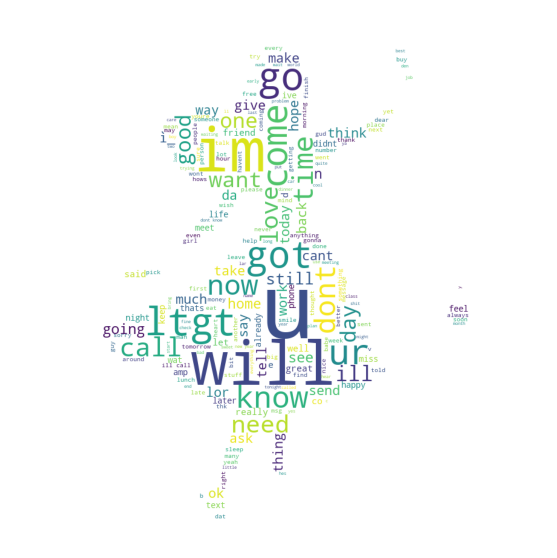

In [81]:
wc(ham,"white")

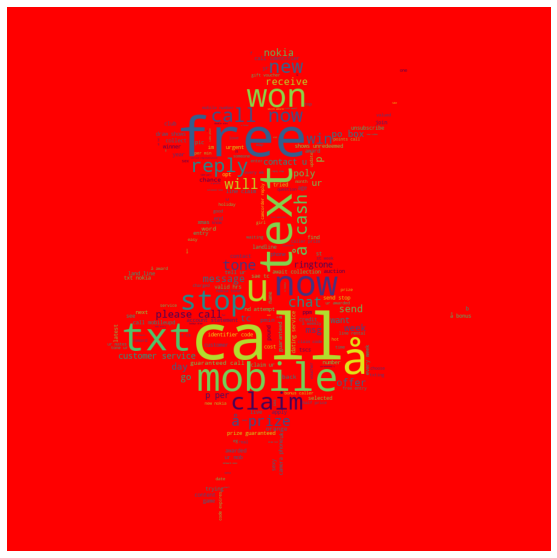

In [82]:
wc(spam,"red")

In [ ]:
#mesajların spam veya ham olmasını tahmin etme

In [83]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [84]:
x = df["Text"]
y = df["Label"]

In [85]:
vect = CountVectorizer(stop_words = "english")

In [86]:
x = vect.fit_transform(x)

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [88]:
MB = MultinomialNB()

In [89]:
tahmin = MB.fit(x_train,y_train).predict(x_test)

In [90]:
accuracy_score(tahmin,y_test)
#%97 başarı oranıyla spam mesajları tahmin ediyor

0.9712849964106246

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
D = DecisionTreeClassifier()

In [73]:
tahmin1 = D.fit(x_train,y_train).predict(x_test)

In [74]:
accuracy_score(tahmin1,y_test)

0.9612347451543432